<a href="https://colab.research.google.com/github/SDS-AAU/SDS-master/blob/master/M3/notebooks/M3_ANN_Python_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks 101 - With Penguins

In this network we are going to apply a neural network model to the penguin data that we worked with in M1. You will see how the network architecture needs to be set up to achieve the same results that we have seen in the SML intro exercise.

We are going to use Keras-TensorFlow and utilize a GPU (only on Colab) for this exercise.

The neural net classification code is inspired by the recent adjustment to the new Keras API as described here: https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/

In [1]:
!nvidia-smi

Mon Nov  9 19:31:08 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
#Import packaging
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")

In [4]:
penguins.head()

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
penguins.dropna(inplace=True)

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [7]:
X = penguins.iloc[:,2:6]

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
# This is new: We encode a categorical variable. 

y = penguins.iloc[:, 0]
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)


Let's split the data and fit a simple logistic model

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class="ovr") # since we have 3 classes
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
model.score(X_test, y_test)

0.9552238805970149

We can use the LabelEncoder to obtain the initial labels of the penguins to see how well the model performed

In [13]:
true_penguins = labelencoder_y.inverse_transform(y_test)

predicted_penguins = labelencoder_y.inverse_transform(model.predict(X_test))

In [14]:
df = pd.DataFrame({'true_penguins': true_penguins, 'predicted_penguins': predicted_penguins}) 

pd.crosstab(df.true_penguins, df.predicted_penguins)

predicted_penguins,Adelie,Chinstrap,Gentoo
true_penguins,,,
Adelie,28,0,0
Chinstrap,3,13,0
Gentoo,0,0,23


In [15]:
print(classification_report(true_penguins,predicted_penguins, labels=labelencoder_y.classes_))

              precision    recall  f1-score   support

      Adelie       0.90      1.00      0.95        28
   Chinstrap       1.00      0.81      0.90        16
      Gentoo       1.00      1.00      1.00        23

    accuracy                           0.96        67
   macro avg       0.97      0.94      0.95        67
weighted avg       0.96      0.96      0.95        67



## Let's now switch to building a simple ANN

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.pipeline import Pipeline

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [18]:
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(y)

dummy_y_train = np_utils.to_categorical(y_train)
dummy_y_test = np_utils.to_categorical(y_test)

In [23]:
# Build our first simple Neural Net

model = Sequential()
model.add(Dense(8,activation='relu',input_shape = (4,)))
model.add(Dense(3,activation='softmax'))
model.compile(optimizer = 'adam', loss='categorical_crossentropy',
             metrics=['accuracy'])

In [24]:
# Train the model and generate a "history" object with training logs
history = model.fit(X_train, 
                    dummy_y_train,
                    epochs = 20,
                    batch_size = 5,
                    verbose=1, validation_split=0.1)

Epoch 1/20
48/48 [==============================] - 0s 5ms/step - loss: 0.8069 - accuracy: 0.6958 - val_loss: 0.7432 - val_accuracy: 0.7407
Epoch 2/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6693 - accuracy: 0.8458 - val_loss: 0.6329 - val_accuracy: 0.8519
Epoch 3/20
48/48 [==============================] - 0s 2ms/step - loss: 0.5654 - accuracy: 0.8958 - val_loss: 0.5434 - val_accuracy: 0.8148
Epoch 4/20
48/48 [==============================] - 0s 2ms/step - loss: 0.4808 - accuracy: 0.9167 - val_loss: 0.4719 - val_accuracy: 0.9259
Epoch 5/20
48/48 [==============================] - 0s 2ms/step - loss: 0.4118 - accuracy: 0.9208 - val_loss: 0.4070 - val_accuracy: 0.9259
Epoch 6/20
48/48 [==============================] - 0s 2ms/step - loss: 0.3537 - accuracy: 0.9208 - val_loss: 0.3476 - val_accuracy: 0.9259
Epoch 7/20
48/48 [==============================] - 0s 2ms/step - loss: 0.3069 - accuracy: 0.9208 - val_loss: 0.2997 - val_accuracy: 0.9630
Epoch 8/20
48/48 [==

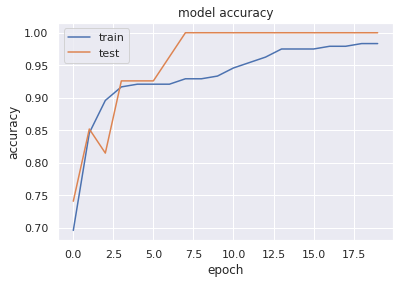

In [25]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
model.evaluate(X_test, dummy_y_test)

3/3 [==============================] - 0s 3ms/step - loss: 0.0860 - accuracy: 0.9701


[0.0859844908118248, 0.9701492786407471]

## Training the model using Sklearn API wrapper (to make it fit better in the regular ML workflow)

In [27]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(8, input_dim=4, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [28]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=20, batch_size=5, verbose=0)

In [29]:
estimator.fit(X_train, dummy_y_train)

In [30]:
estimator.score(X_test, dummy_y_test)

0.9552238583564758

In [31]:
true_penguins = labelencoder_y.inverse_transform(y_test)

predicted_penguins = labelencoder_y.inverse_transform(estimator.predict(X_test))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [32]:
print(classification_report(true_penguins,predicted_penguins, labels=labelencoder_y.classes_))

              precision    recall  f1-score   support

      Adelie       0.90      1.00      0.95        28
   Chinstrap       1.00      0.81      0.90        16
      Gentoo       1.00      1.00      1.00        23

    accuracy                           0.96        67
   macro avg       0.97      0.94      0.95        67
weighted avg       0.96      0.96      0.95        67



## Adding some KFold cross-validatoin

In [33]:
kfold = KFold(n_splits=2, shuffle=True)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)

In [34]:
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 98.20% (0.00%)


## Your Turn

Using the Keras API and reference https://keras.io/ and in particular construct additional simple models (with appropriate metrics):

- Regression example
- Multi-label example

Additional resources: 
Consider code examples here: 

- https://keras.io/examples/structured_data/

- https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/ (and other Keras tutorials)
